In [ ]:
# Project Code

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

def covid():
    df_cases = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
    df_deaths = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

    df_cases.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_"], axis = 1, inplace = True)
    df_deaths.drop(["UID", "iso2", "iso3", "code3", "FIPS", "Country_Region", "Lat", "Long_"], axis = 1, inplace = True)

    df_cases.rename(columns = {"Admin2":"county", "Province_State":"state", "Combined_Key":"county_state"}, inplace = True)
    df_deaths.rename(columns = {"Admin2":"county", "Province_State":"state", "Combined_Key":"county_state"}, inplace = True)

    df_cases_melted = pd.melt(df_cases, id_vars = ['county', 'state', 'county_state'], var_name = "dates", value_name = "cases")
    df_deaths_melted = pd.melt(df_deaths, id_vars = ['county', 'state', 'county_state'], var_name = "dates", value_name = "deaths")

    df_merged = pd.merge(df_cases_melted, df_deaths_melted, how = 'left', on = ['county', 'state', 'county_state', 'dates'])
    df_merged['dates'] = pd.to_datetime(df_merged['dates'])
    df_merged['us_outbreak'] = df_merged['dates'] - df_merged['dates'].min()

    df_state_cases = df_merged.groupby(["state", "us_outbreak", "dates"], as_index = False)["cases"].sum()
    df_state_cases["new_cases"] = df_state_cases["cases"].diff()

    df_state_deaths = df_merged.groupby(["state", "us_outbreak", "dates"], as_index = False)["deaths"].sum()
    df_state_deaths["new_deaths"] = df_state_deaths["deaths"].diff()
    
    df_state_merged = pd.merge(df_state_cases, df_state_deaths, how = 'left', on = ['state', 'dates', 'us_outbreak'])
    
    name = input("Hello. Please enter your name: ")
    print(f"\n\nIt has been {df_state_merged['us_outbreak'].iloc[-1].days} days since the US outbreak of COVID-19. For which state would you like to view COVID-19 information?")
    us_state = input("\tEnter state: ")
    df_state_subset = df_state_merged[df_state_merged['state'] == us_state]
    print(f"\nOkay, {name}. Here's the information for {us_state}:\n")
    print(f"Based on the last reported date: {df_state_merged['dates'].iloc[-1].strftime('%m/%d/%Y')}, the number of new COVID-19 cases in {us_state} is {int(df_state_subset['new_cases'].iloc[-1])}.")
    print(f"The number of new deaths is {int(df_state_subset['new_deaths'].iloc[-1])}.\n")
    if df_state_subset['new_cases'].iloc[-1] >= df_state_subset['new_cases'].iloc[-2]:
        cases_change = "increased"
    else:
        cases_change = "decreased"
    if df_state_subset["new_deaths"].iloc[-1] >= df_state_subset["new_deaths"].iloc[-2]:
        deaths_change = "increased"
    else:
        deaths_change = "decreased"
    print(f"The number of cases {cases_change} from the previous day count of {int(df_state_subset['new_cases'].iloc[-2])}.")
    print(f"The number of deaths {deaths_change} from the previous day count of {int(df_state_subset['new_deaths'].iloc[-2])}.\n")
    print(f"The total number of COVID-19 cases in {us_state} is {int(df_state_subset['cases'].iloc[-1])} and the total number of reported deaths is {int(df_state_subset['deaths'].iloc[-1])}.\n")
    print(f"{name}, please select which data visualization to view for {us_state}:")
    print("\tEnter 1 to view the 15-day trend for new reported cases.")
    print("\tEnter 2 to view the 15-day trend for new reported deaths.")
    data_visual = int(input("Enter number: "))
    if data_visual == 1:
        plt.figure(figsize = (10,8)) 
        plt.bar(df_state_subset['dates'].iloc[-15:].astype(str), df_state_subset['new_cases'].iloc[-15:])
        plt.xticks(rotation = 90)
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.title(f"{us_state} COVID-19 Cases")
        plt.show()
        print(f"The 15-day average of new reported cases is {int(df_state_subset['new_cases'].iloc[-15:].mean())}, ranging between {int(df_state_subset['new_cases'].iloc[-15:].min())} and {int(df_state_subset['new_cases'].iloc[-15:].max())}.")
    if data_visual == 2:
        plt.figure(figsize = (10,8))
        plt.bar(df_state_subset['dates'].iloc[-15:].astype(str), df_state_subset['new_deaths'].iloc[-15:])
        plt.xticks(rotation = 90)
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.title(f"{us_state} COVID-19 Deaths")
        plt.show()
        print(f"The 15-day average of new reported deaths is {int(df_state_subset['new_deaths'].iloc[-15:].mean())}, ranging between {int(df_state_subset['new_deaths'].iloc[-15:].min())} and {int(df_state_subset['new_deaths'].iloc[-15:].max())}.")

Hello. Please enter your name: Nam Anh


It has been 1114 days since the US outbreak of COVID-19. For which state would you like to view COVID-19 information?
	Enter state: Virginia

Okay, Nam Anh. Here's the information for Virginia:

Based on the last reported date: 02/09/2023, the number of new COVID-19 cases in Virginia is 0.
The number of new deaths is 0.

The number of cases decreased from the previous day count of 71.
The number of deaths decreased from the previous day count of 39.

The total number of COVID-19 cases in Virginia is 2269006 and the total number of reported deaths is 23462.

Nam Anh, please select which data visualization to view for Virginia:
	Enter 1 to view the 15-day trend for new reported cases.
	Enter 2 to view the 15-day trend for new reported deaths.
Enter number: 1


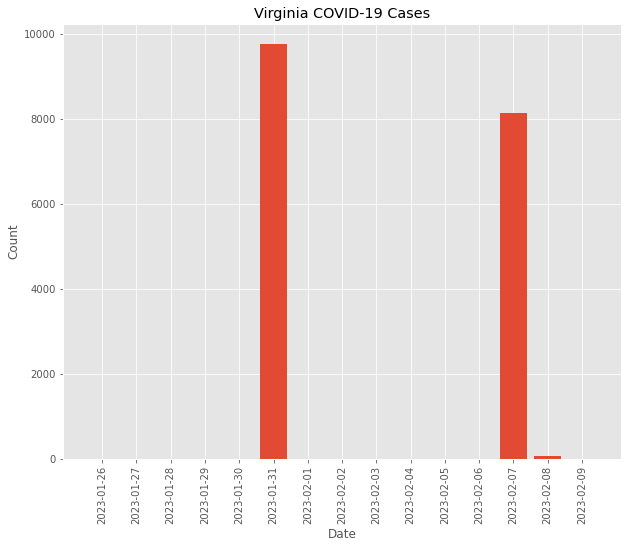

The 15-day average of new reported cases is 1197, ranging between 0 and 9754.


In [2]:
# COVID-19 cases

covid()

In [ ]:
# COVID-19 deaths

covid()